In [3]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r'D:\\RAHUL\\IT VEDANT\\PYTHON\\DIWALI SALES PROJECT\\Diwali Sales Data.csv', encoding = 'unicode_escape')

In [5]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [6]:
df.describe()


,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [7]:
df.shape

(11251, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
# The columns status and unnamed do not have values hence we can drop them


In [10]:
# Dropping blank columns
df.drop(['Status','unnamed1'], axis = 1 , inplace = True)

In [11]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
# Dropping null values
df.dropna(inplace = True)

In [13]:
df.shape

(11239, 13)

In [14]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [15]:
df['Amount']=df['Amount'].astype('int')

In [16]:
df['Amount'].dtypes

dtype('int32')

In [17]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

## GENDER

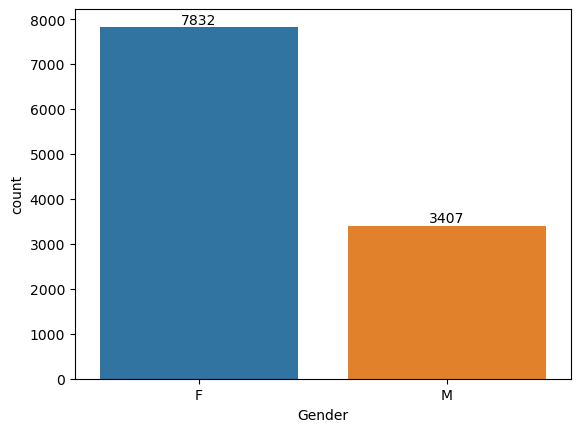

In [18]:
ax = sns.countplot(x='Gender', data = df)
for bars in ax.containers :
    ax.bar_label(bars)

In [19]:
# FEMALES ORDER MORE GOODS THAN MEN

In [20]:
df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False) 

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

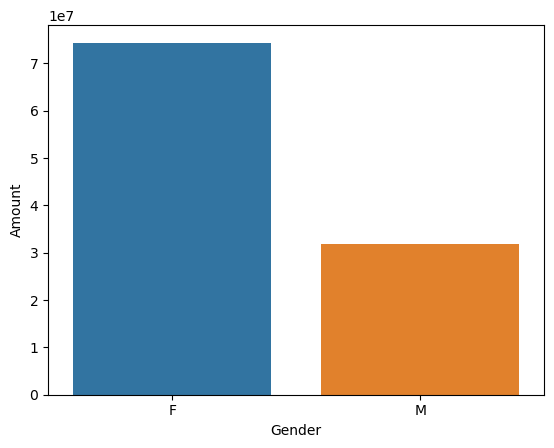

In [21]:
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False) 

sns.barplot(x='Gender', y = "Amount", data = sales_gen)


# Age

In [22]:
  df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

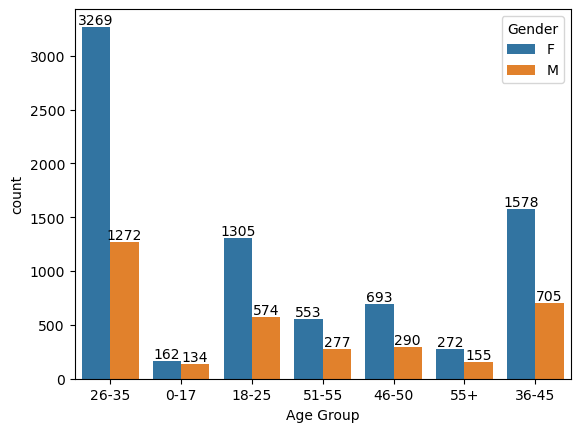

In [23]:
ax = sns.countplot(data = df , x = 'Age Group' , hue = 'Gender' )
for bars in ax.containers :
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

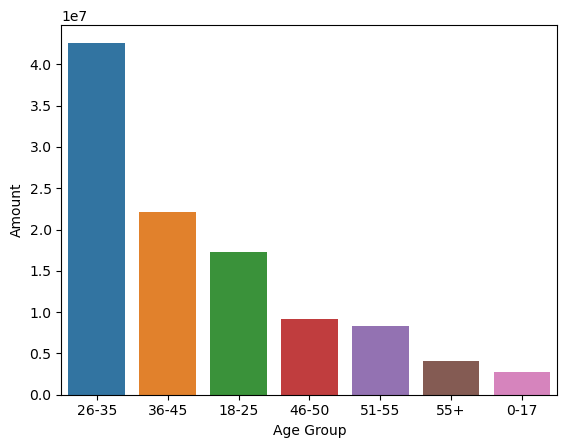

In [24]:
# Total Amount vs Age Group

sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False) 

sns.barplot(x='Age Group', y = "Amount", data = sales_age)

## From the above graph we can see that most of the buyers are of age group between 26-35 years female

# STATE

<Axes: xlabel='State', ylabel='Orders'>

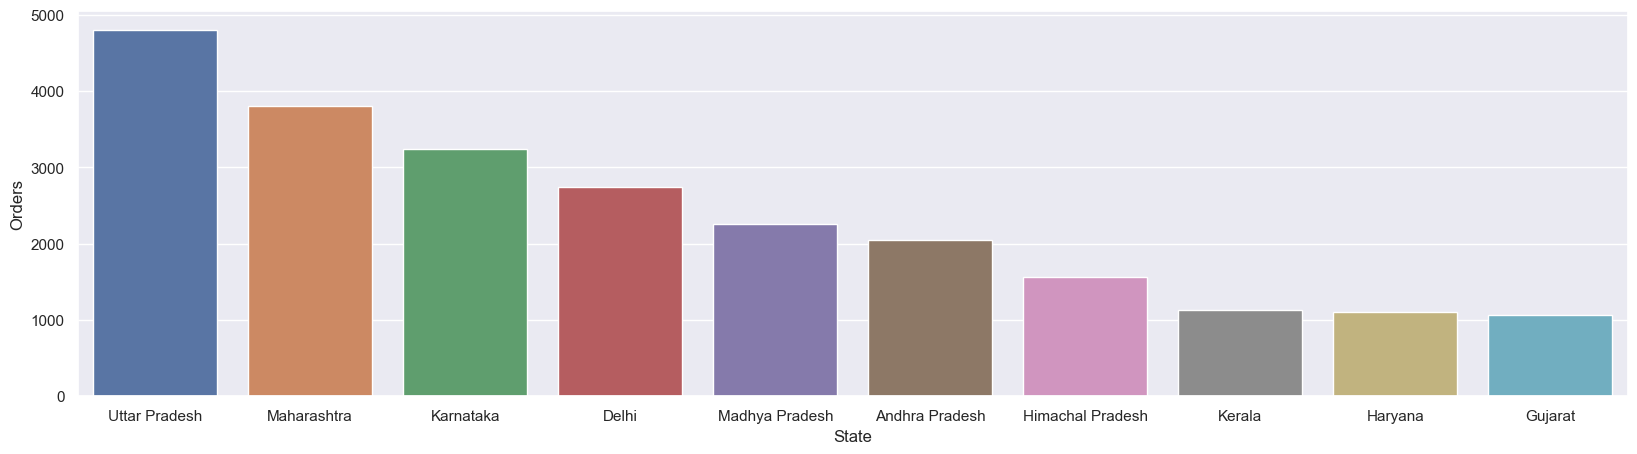

In [28]:
# Total number of orders from the top 10 states
sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by='Orders',ascending = False).head(10) 

sns.set(rc={'figure.figsize': (20,5)})
sns.barplot(x ='State', y = "Orders", data = sales_state)

<Axes: xlabel='State', ylabel='Amount'>

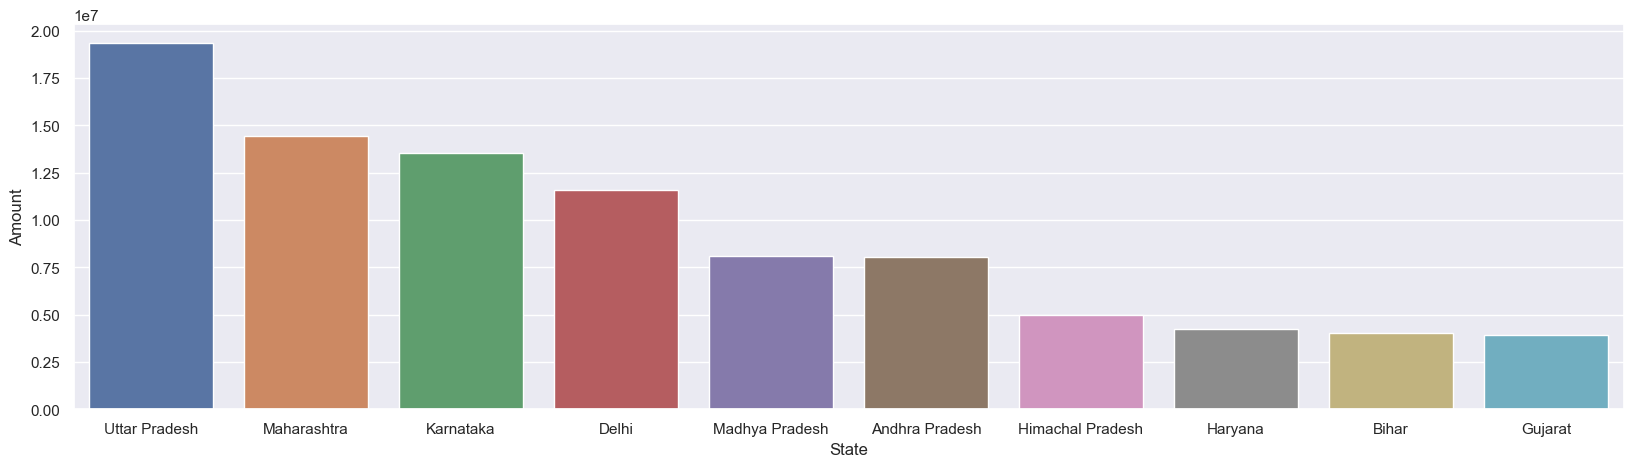

In [31]:
# Total Amount from the top 10 states

sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False).head(10) 
sns.set(rc={'figure.figsize': (20,5)})
sns.barplot(x='State', y = "Amount", data = sales_state)

# Most of orders are from UP , Maharashtra and Karnataka 

# MARITAL STATUS

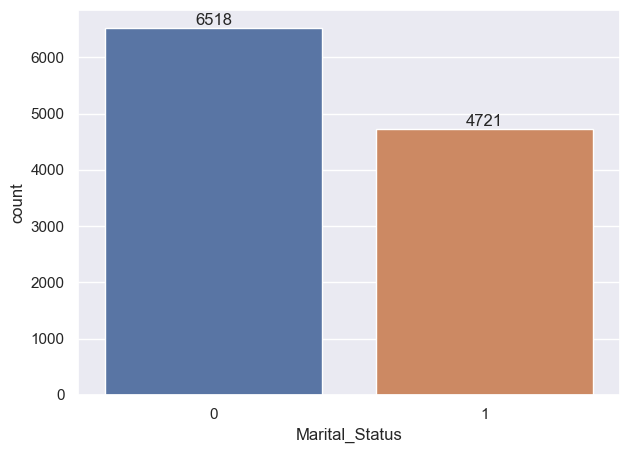

In [34]:
ax = sns.countplot(x='Marital_Status', data = df)
sns.set(rc={'figure.figsize': (5,5)})
for bars in ax.containers :
    ax.bar_label(bars)
    
    

<Axes: xlabel='Marital_Status', ylabel='Amount'>

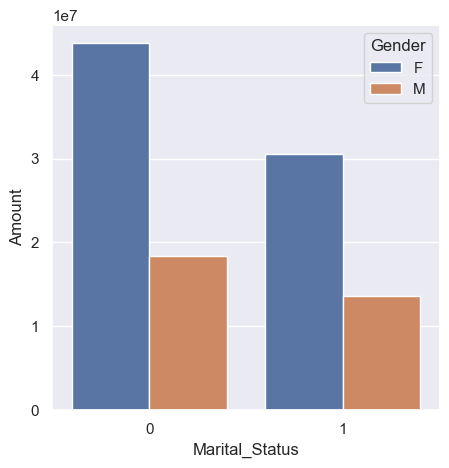

In [36]:
marital_status = df.groupby(['Gender','Marital_Status'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False)
sns.set(rc={'figure.figsize': (5,5)})
sns.barplot(data = marital_status , x='Marital_Status', y = "Amount", hue ='Gender')

## From the above graphs we can see that most of buyers are married(women) and they have high purchasing power

# OCCUPATION

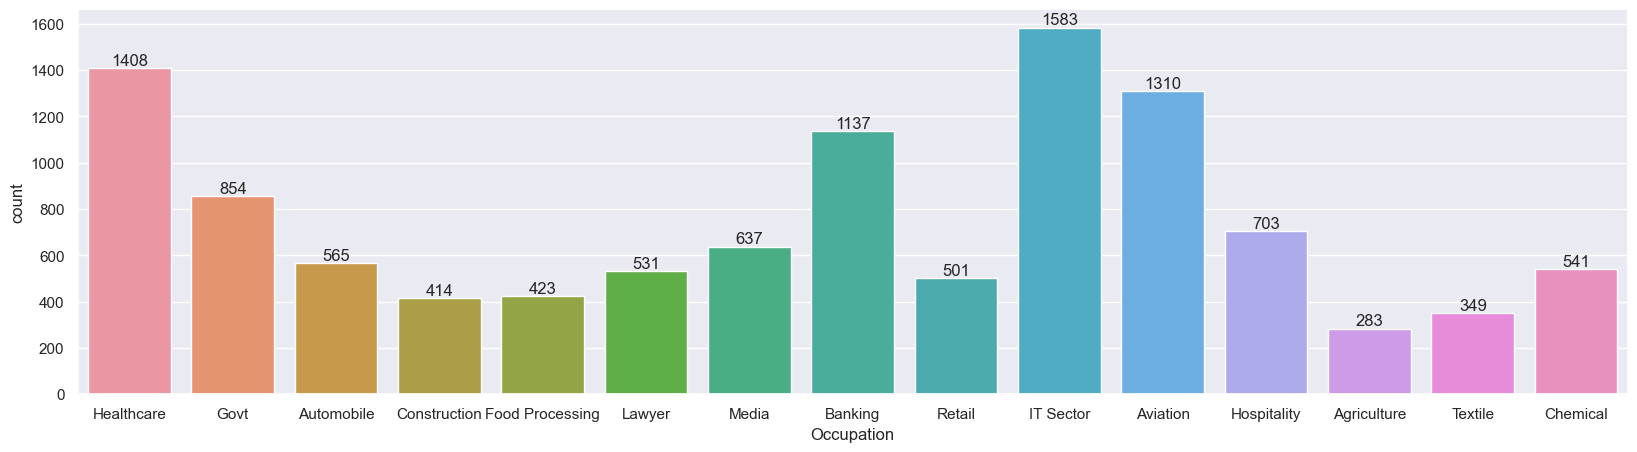

In [42]:
ax = sns.countplot(x='Occupation', data = df)
sns.set(rc={'figure.figsize': (20,5)})
for bars in ax.containers :
    ax.bar_label(bars)
    

<Axes: xlabel='Occupation', ylabel='Amount'>

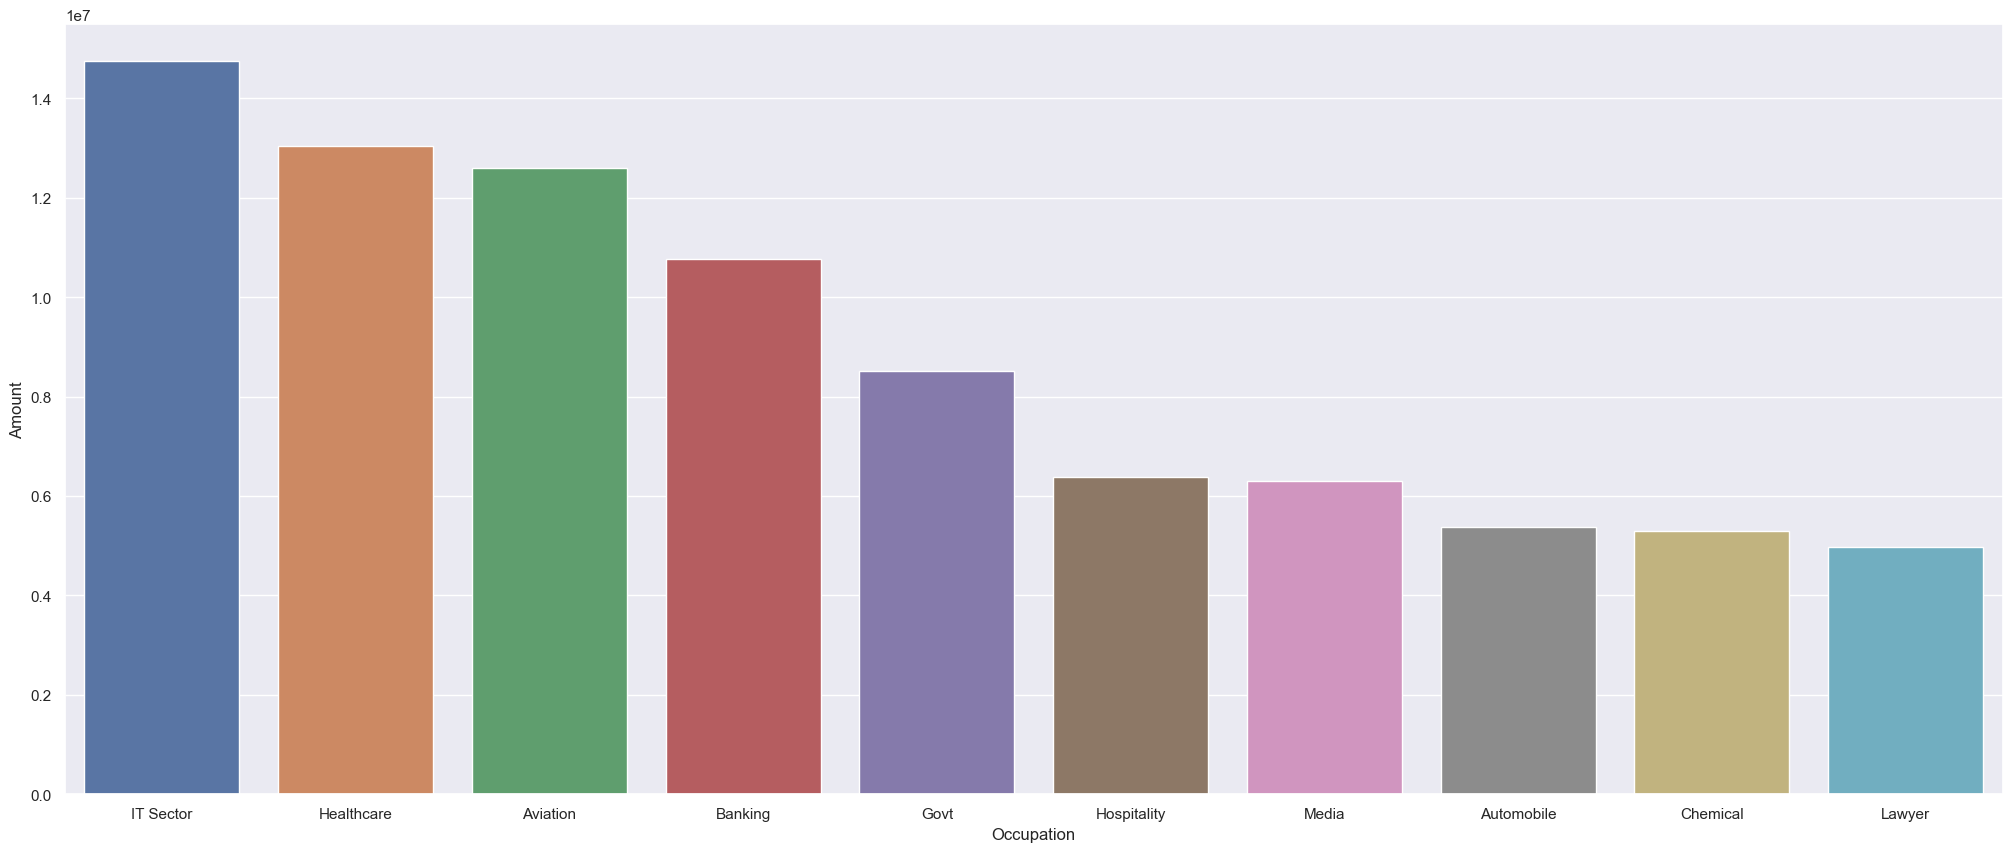

In [48]:
occupation = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False).head(10)
sns.set(rc={'figure.figsize': (25,10)})
sns.barplot(data = occupation , x= 'Occupation', y = "Amount")

## From the above graph we can see that most of the buyers are from IT , Healthcare and Aviation sector

# PRODUCT CATEGORY

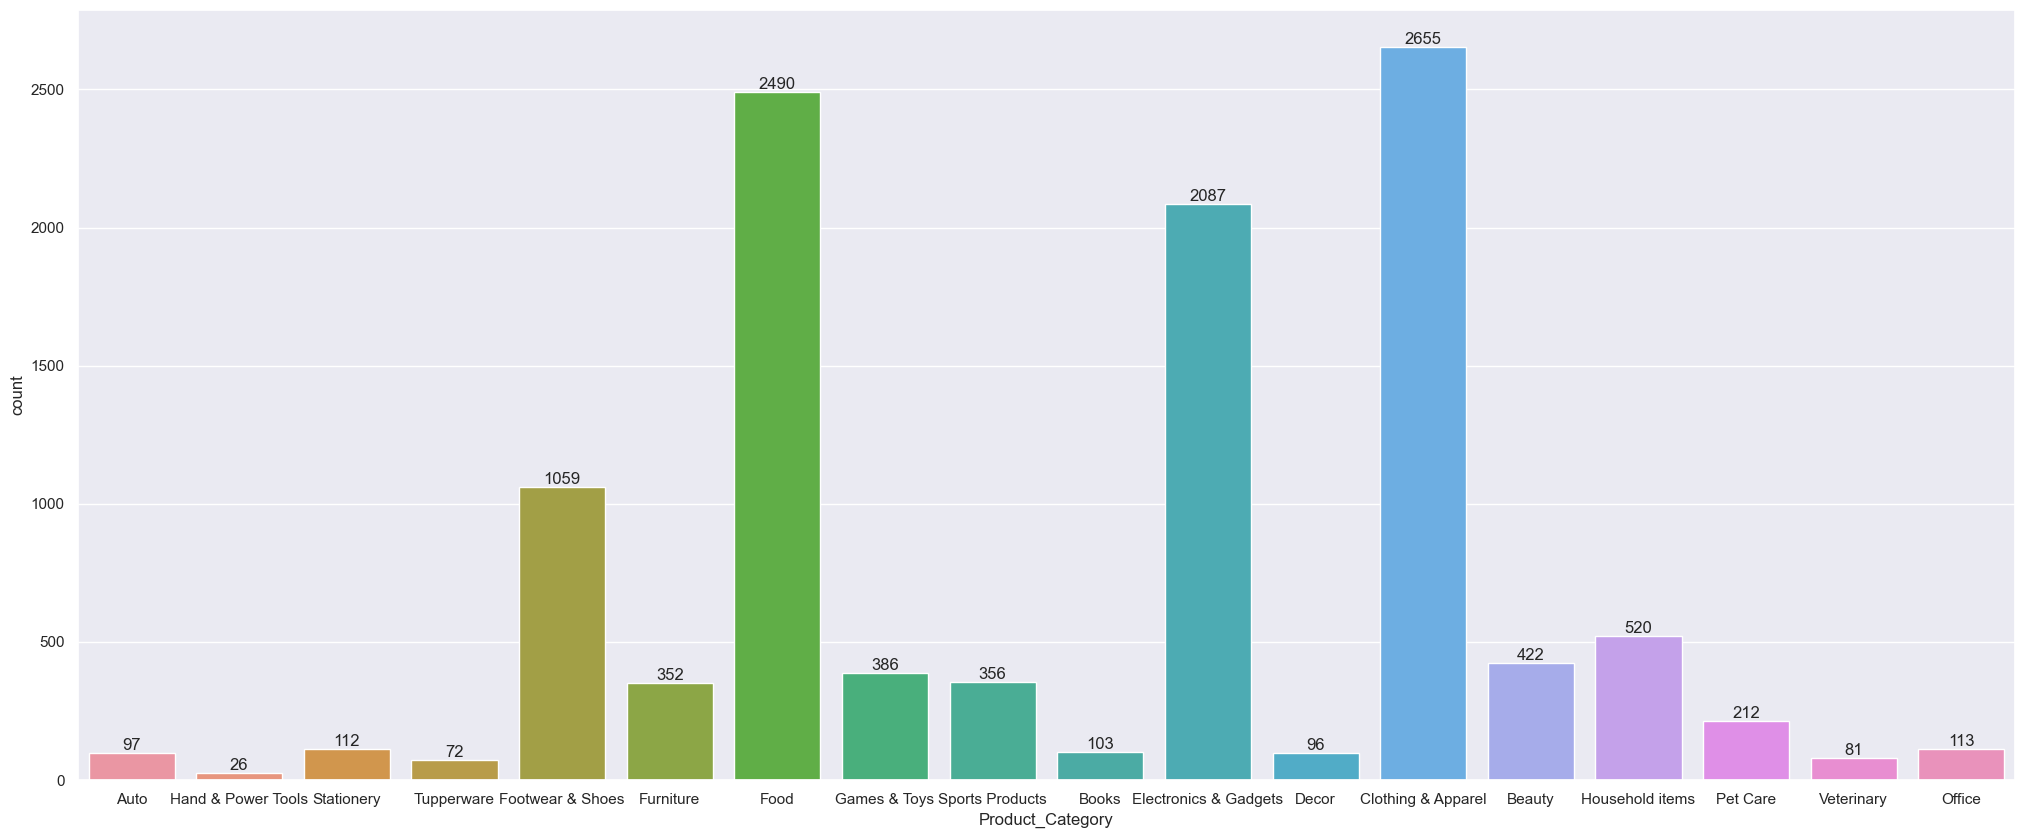

In [50]:
ax = sns.countplot(x='Product_Category', data = df)
sns.set(rc={'figure.figsize': (20,5)})
for bars in ax.containers :
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

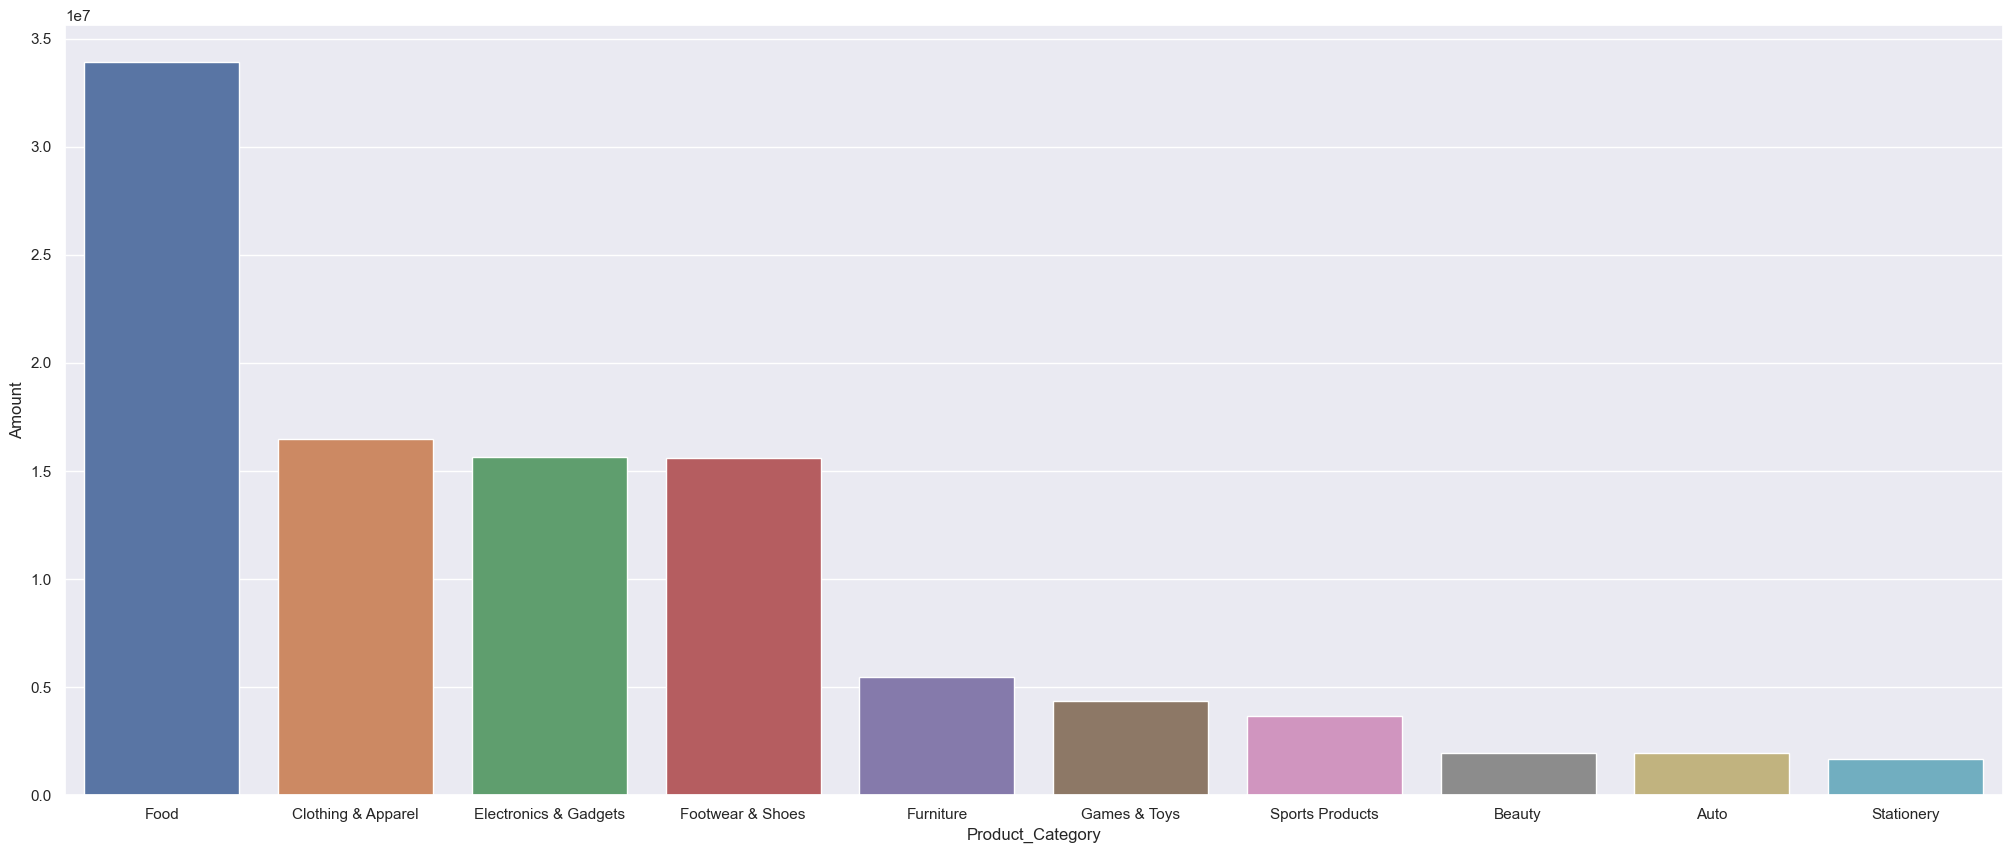

In [51]:
product_category = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False).head(10)
sns.set(rc={'figure.figsize': (25,10)})
sns.barplot(data = product_category , x= 'Product_Category', y = "Amount")

## From above graphs we can see that most of sold products are from Food , footwear and electronics category

# CONCLUSION

## Married women age group 26-35 years from UP , Maharashtra and Karnataka working in IT , Healthcare and Aviation are more likely to buy products from Food , Clothing and Electronics category